In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


df = pd.read_csv('titanic_train.csv')

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [45]:
cols = df.columns.tolist()
cols = [cols[1]] + cols[0:1] + cols[2:]

df = df[cols]

train_data = df.values

In [46]:
# Set some variables
number_passengers = df.shape[0] 
number_survived = len(df[df.Survived == 1])

# # What proportion of the passengers survived?
proportion_survived = float(number_survived) / number_passengers
print('The proportion of passengers who survived is %s.' % proportion_survived)

The proportion of passengers who survived is 0.3838383838383838.


In [47]:
# How can we determine what proportion of the women and of the men who survived?
# Let's start by segregating the men and women
women = df[df.Sex == "female"]
men = df[df.Sex != "female"]

# Determine the proportion of women who survived
proportion_women_survived = float(len(women[women.Survived == 1])) / len(women)
print('The proportion of women who survived is %s.' % proportion_women_survived)

# Determine the proportion of men who survived
proportion_men_survived = float(len(men[men.Survived == 1])) / len(men)
print('The proportion of men who survived is %s.' % proportion_men_survived)


The proportion of women who survived is 0.7420382165605095.
The proportion of men who survived is 0.18890814558058924.


In [48]:
# 'Sex' is stored as a text value. We should convert (or 'map') it into numeric binaries 
# so it will be ready for scikit-learn.
df['Sex'] = df['Sex'].map({'male': 0,'female': 1})

# Scikit-learn won't be tolerant of the missing values. In the last class, we dropped
# the 'Ticket' column. Let's also drop the 'Cabin', 'Name' and 'Embarked' columns
df = df.drop(['Name', 'Ticket', 'Cabin','Embarked'], axis=1)
df.head(10)

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,3,0,22.0,1,0,7.2500
1,1,2,1,1,38.0,1,0,71.2833
2,1,3,3,1,26.0,0,0,7.9250
3,1,4,1,1,35.0,1,0,53.1000
4,0,5,3,0,35.0,0,0,8.0500
5,0,6,3,0,NaN,0,0,8.4583
6,0,7,1,0,54.0,0,0,51.8625
7,0,8,3,0,2.0,3,1,21.0750
8,1,9,3,1,27.0,0,2,11.1333
9,1,10,2,1,14.0,1,0,30.0708


In [49]:
#Fill the NA fields with a mean age, as scikit would not be able to deal with NA
age_mean = df['Age'].mean()
df['Age'] = df['Age'].fillna(age_mean)

df.head(10)

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,1,3,0,22.000000,1,0,7.2500
1,1,2,1,1,38.000000,1,0,71.2833
2,1,3,3,1,26.000000,0,0,7.9250
3,1,4,1,1,35.000000,1,0,53.1000
4,0,5,3,0,35.000000,0,0,8.0500
5,0,6,3,0,29.699118,0,0,8.4583
6,0,7,1,0,54.000000,0,0,51.8625
7,0,8,3,0,2.000000,3,1,21.0750
8,1,9,3,1,27.000000,0,2,11.1333
9,1,10,2,1,14.000000,1,0,30.0708


## Logistic Regression
A logistic regression mathematically calculates the decision boundary between the possibilities. It looks for a straight line that represents a cutoff that most accurately represents the training data.

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
# Initialize our algorithm
lr = LogisticRegression(random_state=1)

In [52]:
# Define our predictors
predictors = ["Pclass", "Sex", "Age", "SibSp","Parch","Fare"]
expected  = df["Survived"]

# Train the algorithm using all the training data
lr.fit(df[predictors], expected)

# Make predictions using the training set -- where we already know the correct answers
predicted = lr.predict(df[predictors])

In [53]:
# Make predictions based on the test data
predictions = lr.predict(df[predictors])

# Final Frame
test_predictions = pd.DataFrame({
        "PassengerId": df["PassengerId"],
        "Survived": predictions
    })
test_predictions.head(10)

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1


## Cross Validation

In [54]:
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split

In [55]:
X = df[["Pclass", "Sex", "Age", "SibSp","Parch","Fare"]]
y = df["Survived"]
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size = 0.2)
log_reg = lr.fit(X_train, y_train)

In [56]:
# Every estimator has a score method that can judge the quality of the 
# fit (or the prediction) on new data. Bigger is better.   
log_reg.score(X_test, y_test)

0.82122905027932958

Let us ask for a classification report

In [57]:
from sklearn.metrics import classification_report

In [58]:
expected   = y_test
predicted  = log_reg.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Perished","Survived"])
print(classificationReport)

             precision    recall  f1-score   support

   Perished       0.80      0.94      0.86       109
   Survived       0.87      0.64      0.74        70

avg / total       0.83      0.82      0.81       179



Precision is the number of correct positive results divided by the number of all positive results (e.g. how many of the passengers we predicted would survive actually did survive?).

Recall is the number of correct positive results divided by the number of positive results that should have been returned (e.g. how many of the passengers who did survive did we accurately predict would survive?).


The F1 score is a measure of a test's accuracy. It considers both the precision and the recall of the test to compute the score. The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst at 0.


precision = true positives / (true positives + false positives)

recall = true positives / (false negatives + true positives)

F1 score = 2 * ((precision * recall) / (precision + recall))

In [59]:
def plot_classification_report(cr, title='Classification report', cmap=plt.cm.Reds):

    lines = cr.split('\n')
    classes = []
    plotMat = []

    for line in lines[2 : (len(lines) - 3)]:
        t = line.split()
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        plotMat.append(v)

    fig, ax = plt.subplots(1)
    fig = plt.imshow(plotMat, interpolation='nearest', cmap=cmap)
    
    for c in range(len(plotMat)+1):
        for r in range(len(classes)):
            try:
                txt = plotMat[r][c]
                ax.text(c,r,plotMat[r][c],va='center',ha='center')
            except IndexError:
                pass
            
    plt.title(title)
    plt.colorbar()
    x_tick_marks = np.arange(3)
    y_tick_marks = np.arange(len(classes))
    plt.xticks(x_tick_marks, ['precision', 'recall', 'f1-score'], rotation=45)
    plt.yticks(y_tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Classes')
    plt.xlabel('Measures')

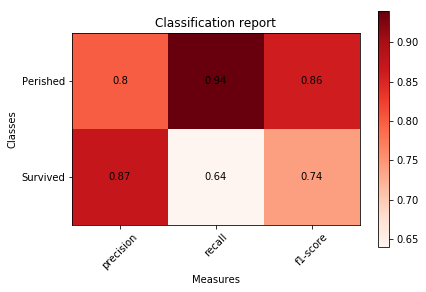

In [60]:
plot_classification_report(classificationReport)

In [61]:
# Make predictions based on the test data
predictions = log_reg.predict(df[predictors])

## Random Forest

Read more about Random Forests here:
http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
# We'll select 50 trees and opt for 'out-of-bag' samples to estimate the generalization error.
rf = RandomForestClassifier(n_estimators=50, oob_score=True)

In [64]:
# Next split up the data with the 'train test split' method in the Cross Validation module
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# ...and then run the 'fit' method to build a forest of trees
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=1, oob_score=True, random_state=None,
            verbose=0, warm_start=False)

In [65]:
rf.score(X_test, y_test)

0.7988826815642458

In [66]:
expected   = y_test
predicted  = rf.predict(X_test)
classificationReport = classification_report(expected, predicted, target_names=["Perished","Survived"])
print(classificationReport)

             precision    recall  f1-score   support

   Perished       0.82      0.87      0.84       111
   Survived       0.77      0.68      0.72        68

avg / total       0.80      0.80      0.80       179



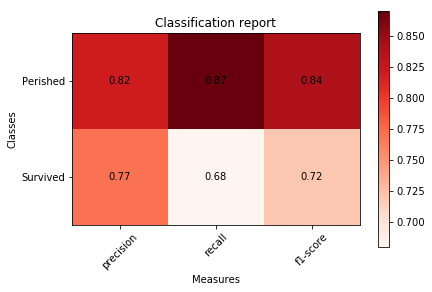

In [67]:
plot_classification_report(classificationReport)

In [68]:
# Make predictions based on the test data
predictions = rf.predict(df[predictors])

## SVM
Support vector machines use points in transformed problem space to separate the classes into groups.

In [69]:
from sklearn.svm import SVC

In [70]:
kernels = ['rbf']

splits     = cross_validation.train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel != 'poly':
        model      = SVC(kernel=kernel)
    else:
        model      = SVC(kernel=kernel, degree=3)

model.fit(X_train, y_train)
expected   = y_test
predicted  = model.predict(X_test)

SVC_report = classification_report(expected, predicted)
print(SVC_report)

             precision    recall  f1-score   support

          0       0.68      0.84      0.75       107
          1       0.64      0.42      0.50        72

avg / total       0.66      0.67      0.65       179



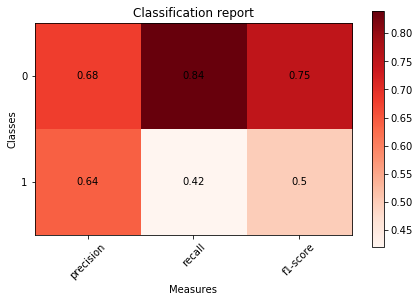

In [71]:
plot_classification_report(SVC_report)

In [72]:
# Make predictions based on the test data
predictions = model.predict(df[predictors])
svm = pd.DataFrame({
        "PassengerId": df["PassengerId"],
        "Survived": predictions
    })

svm.head(10)

,PassengerId,Survived
0,1,0
1,2,1
2,3,0
3,4,1
4,5,0
5,6,0
6,7,0
7,8,0
8,9,1
9,10,1


## Grid Search for Optimization of C and gamma

In [73]:
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

train_data = df.values

parameter_grid = {
    'C': [1., 10.],
    'gamma': [0.1, 1.]
}

grid_search = GridSearchCV(SVC(kernel='rbf'), parameter_grid, cv=5, verbose=3)
grid_search.fit(train_data[0:,2:], train_data[0:,0])

sorted(grid_search.grid_scores_, key=lambda x: x.mean_validation_score)
grid_search.best_score_
grid_search.best_params_

print(grid_search.best_params_['gamma'])
print(grid_search.best_params_['C'])

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] C=1.0, gamma=0.1 ................................................
[CV] ....................... C=1.0, gamma=0.1, score=0.592179 -   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ....................... C=1.0, gamma=0.1, score=0.681564 -   0.0s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ....................... C=1.0, gamma=0.1, score=0.707865 -   0.1s
[CV] C=1.0, gamma=0.1 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] ....................... C=1.0, gamma=0.1, score=0.747191 -   0.1s
[CV] C=1.0, gamma=0.1 ................................................
[CV] ....................... C=1.0, gamma=0.1, score=0.740113 -   0.1s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ....................... C=1.0, gamma=1.0, score=0.664804 -   0.1s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ....................... C=1.0, gamma=1.0, score=0.653631 -   0.1s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ....................... C=1.0, gamma=1.0, score=0.707865 -   0.0s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ....................... C=1.0, gamma=1.0, score=0.685393 -   0.0s
[CV] C=1.0, gamma=1.0 ................................................
[CV] ....................... C=1.0, gamma=1.0, score=0.621469 -   0.1s
[CV] C=10.0, gamma=0.1 ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    1.4s finished


In [74]:
kernels = ['linear']

splits     = cross_validation.train_test_split(X,y, test_size=0.2)
X_train, X_test, y_train, y_test = splits

for kernel in kernels:
    if kernel == 'rbf':
        model      = SVC(kernel=kernel,C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'],degree=3)
    
model.fit(X_train, y_train)
expected   = y_test
predicted  = model.predict(X_test)

SVC_report = classification_report(expected, predicted)
print(SVC_report)

             precision    recall  f1-score   support

          0       0.63      0.83      0.72        99
          1       0.65      0.40      0.50        80

avg / total       0.64      0.64      0.62       179



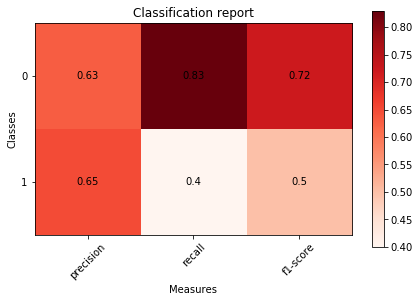

In [75]:
plot_classification_report(SVC_report)

## We evaluate the effectiveness of feature selection
We use RFE

In [76]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [77]:
model=LinearRegression()
rfe = RFE(estimator=model,n_features_to_select=3,step=1,verbose=1)
fit = rfe.fit(X,y)
print('Number of features %d'% fit.n_features_) 
print('Selected Features %s'% fit.support_) 
print('Feature Ranking %s' % fit.ranking_) 
X.head(5)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Number of features 3
Selected Features [ True  True False  True False False]
Feature Ranking [1 1 3 1 2 4]


,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500


## Extra Trees Classifier 
This is used to dertermine the importance of which feature is to be considered in combination with other features.

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

In [36]:
model = ExtraTreesClassifier(n_estimators=30)
model.fit(X,y)
print(model.feature_importances_)

[ 0.11411851  0.29624691  0.24855388  0.04160818  0.0358641   0.26360842]


## We use AdaBoost, Random Forest 

In [37]:
from sklearn.ensemble import (RandomForestClassifier,AdaBoostClassifier)
from sklearn.tree import DecisionTreeClassifier

In [38]:
n_classes = 3
n_estimators = 250

In [39]:
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=3),n_estimators=n_estimators)
rf = RandomForestClassifier(n_estimators=n_estimators)

### Evaluate Ada

In [40]:
ada.fit(X,y)
print(ada.feature_importances_)

[ 0.06395303  0.04557787  0.4117065   0.03997739  0.02481779  0.41396741]


### Evaluate Random Forest

In [41]:
rf.fit(X,y)
print(rf.feature_importances_)

[ 0.08755378  0.26967288  0.27019035  0.04881828  0.03536178  0.28840292]


In [42]:
X.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
